In [520]:
reset -fs

In [522]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn import linear_model, tree
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict,GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
 
from sklearn.metrics import roc_curve, confusion_matrix,precision_recall_curve,roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score 

import xgboost as xgb # note for installation use py-xgboost in conda

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics

from xgboost import XGBClassifier

%matplotlib inline
plt.style.use('seaborn')
np.random.seed(42)

In [523]:
def isNaN(num):
    return num != num

In [524]:
train = pd.read_csv('application_train.csv')
test = pd.read_csv('application_test.csv')
test['target'] = -999
train.columns = train.columns.str.lower()
test.columns = test.columns.str.lower()

train['dataset'], test['dataset'] = 0, 1

X = pd.concat([train,test],sort=True)

In [525]:
X['age'] = X['days_birth'].apply(lambda x: int(x / -365))
X.drop('days_birth', axis=1, inplace=True)

In [526]:
X['employed'] = X['days_employed'].apply(lambda x: int(x / -365))
X.drop('days_employed', axis=1, inplace=True)
X = X[X['employed'] != -1000]

In [527]:
X['app_nan'] = X['apartments_medi'].apply(lambda x: 0 if isNaN(x) == True else 1)
X['base_nan'] = X['basementarea_medi'].apply(lambda x: 0 if isNaN(x) == True else 1)

X['age_cat'] = pd.cut(X['age'], bins=[0,35,45,999], labels=[0, 1, 2])
X['emp_cat'] = pd.cut(X['employed'], bins=[0,4,999], labels=[0, 1])


X['higher_educ'] = X['name_education_type'].apply(lambda x: 
                                                  1 if (x == 'Higher education') | 
                                                       (x == 'Academic degree')  
                                                  else 0
                                                 )
X['no_own_prop'] = X['name_housing_type'].apply(lambda x: 
                                                1 if (x == 'With parents') | 
                                                     (x == 'Rented apartment')  
                                                else 0
                                               )
X['blue_collar'] = X['name_income_type'].apply(lambda x: 1 if x == 'Working' else 0)
X['blue_collar2'] = X['occupation_type'].apply(lambda x: 
                                               1 if (x == 'Laborers') |
                                                    (x == 'Cooking staff') |
                                                    (x == 'Sales staff') |
                                                    (x == 'Drivers') |
                                                    (x == 'Security staff') |
                                                    (x == 'Waiters/barmen staff') |
                                                    (x == 'Low-skill Laborers') |
                                                    (x == 'Secretaries') |
                                                    (x == 'missing')
                                               else 0
                                              )

X['elev_nan'] = X['elevators_medi'].apply(lambda x: 0 if isNaN(x) == True else 1)
X['entr_nan'] = X['entrances_medi'].apply(lambda x: 0 if isNaN(x) == True else 1)
X['floorsmax_nan'] = X['floorsmax_medi'].apply(lambda x: 0 if isNaN(x) == True else 1)
X['floorsmin_nan'] = X['floorsmin_medi'].apply(lambda x: 0 if isNaN(x) == True else 1)
X['landarea_nan'] = X['landarea_medi'].apply(lambda x: 0 if isNaN(x) == True else 1)
X['living_nan'] = X['livingapartments_medi'].apply(lambda x: 0 if isNaN(x) == True else 1)
X['area_nan'] = X['livingarea_medi'].apply(lambda x: 0 if isNaN(x) == True else 1)
X['nonliving_nan'] = X['nonlivingapartments_medi'].apply(lambda x: 0 if isNaN(x) == True else 1)
X['nonarea_nan'] = X['nonlivingarea_medi'].apply(lambda x: 0 if isNaN(x) == True else 1)
X['years_nan'] = X['years_build_medi'].apply(lambda x: 0 if isNaN(x) == True else 1)

X['complete'] = X['years_nan'] + X['nonarea_nan'] + X['nonliving_nan'] + X['area_nan'] + X['living_nan'] + \
                X['landarea_nan'] + X['floorsmin_nan'] + X['floorsmax_nan'] + X['entr_nan'] + X['elev_nan']
X['complete'] = X['complete'].apply(lambda x: 1 if x == 0 else 0)

In [528]:
num_features = list(X.columns[X.dtypes!=object])
num_features.remove('target')
cat_features = list(X.columns[(X.dtypes==object) | (X.dtypes=='category')])

In [529]:
for i in X.columns:
    X[i] = X[i].apply(lambda x: float('NaN') if x == 'XNA' else x)

In [530]:
X = X.dropna(subset=['code_gender'])

In [533]:
X = X[['target', 'dataset', 'age', 'employed', 'code_gender',
       'ext_source_1', 'ext_source_2','ext_source_3',
       'app_nan', 'base_nan',
       'higher_educ', 'no_own_prop', 'blue_collar',
       'blue_collar2', 'complete', 'emergencystate_mode'
      ]]

In [535]:
# X[cat_features] = X[cat_features].fillna('missing')
X[cat_features]

KeyError: "['housetype_mode', 'name_contract_type', 'occupation_type', 'fondkapremont_mode', 'name_family_status', 'name_housing_type', 'name_education_type', 'flag_own_car', 'name_income_type', 'organization_type', 'emp_cat', 'age_cat', 'weekday_appr_process_start', 'flag_own_realty', 'wallsmaterial_mode', 'name_type_suite'] not in index"

In [ ]:
X['fond_nan'] = X['fondkapremont_mode'].apply(lambda x: 
                                              0 if x == 'missing' else 1
                                             )
X['housetype_nan'] = X['housetype_mode'].apply(lambda x: 
                                               0 if x == 'missing' else 1
                                              )

In [ ]:
X = X.join(pd.get_dummies(X[cat_features], drop_first=True))
X.drop(cat_features, axis=1, inplace=True)

In [ ]:
########## X[num_features] = X[num_features].fillna(X[num_features].median())

In [ ]:
X_train = X[X.dataset == 0].drop(['target', 'dataset'], axis=1)
y_train = X[X.dataset == 0].target

In [468]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

X_scaled = preprocessing.scale(X_train)

In [202]:
model = RandomForestClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1, verbose=5)
print('Mean ROC AUC: %.3f' % np.mean(scores))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   11.3s


Mean ROC AUC: 0.608


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   39.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   39.4s finished


In [ ]:
model = RandomForestClassifier()
resample = SMOTEENN()
pipeline = Pipeline(steps=[('r', resample), ('m', model)])
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1, verbose=5)

print('Mean ROC AUC: %.3f' % np.mean(scores))

In [469]:
#pos_weight = len(train[train.target == 0]) / len(train[train.target == 1])
model = XGBClassifier(scale_pos_weight = 1)
model.fit(X_scaled, y_train)
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1)
scores = cross_val_score(model, X_scaled, y_train, scoring='roc_auc', cv=cv, n_jobs=-1, verbose=5)
print('Mean ROC AUC: %.3f' % np.mean(scores))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:   40.5s remaining:   50.7s
[Parallel(n_jobs=-1)]: Done   6 out of   9 | elapsed:  1.3min remaining:   38.2s


Mean ROC AUC: 0.741


[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  1.6min finished


In [231]:
#learning_rate = [0.01, 0.1, 0.2, 0.3]
#n_estimators = [50, 100, 150, 200]
#max_depth = [2, 4, 6, 8]
learning_rate = [0.01, 0.1]
n_estimators = [50, 100]
max_depth = [2, 4]
param_grid = dict(learning_rate=learning_rate, max_depth=max_depth, n_estimators=n_estimators)

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)
grid_search = GridSearchCV(model, param_grid, scoring='roc_auc', n_jobs=-1, cv=cv)
grid_result = grid_search.fit(X_train, y_train)

scores = cross_val_score(grid_result, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1, verbose=5)
print('Mean ROC AUC: %.3f' % np.mean(scores))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Mean ROC AUC: 0.736


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  3.4min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  3.4min finished


In [474]:
model = XGBClassifier(learning_rate =0.1,
                      n_estimators=500,
                      max_depth=5,
                      min_child_weight=1,
                      gamma=0,
                      subsample=0.8,
                      colsample_bytree=0.8,
                      objective= 'binary:logistic',
                      nthread=4,
                      scale_pos_weight=1,
                      seed=1
)

model.fit(X_train, y_train)
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1)
scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1, verbose=5)
print('Mean ROC AUC: %.3f' % np.mean(scores))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:  6.1min remaining:  7.7min
[Parallel(n_jobs=-1)]: Done   6 out of   9 | elapsed: 11.2min remaining:  5.6min


Mean ROC AUC: 0.745


[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed: 12.4min finished


In [470]:
def modelfit(alg, dtrain, predictors, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=y_train)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], y_train, eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(y_train, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(y_train, dtrain_predprob))
                    
    print(model.feature_importances_)
    # plot
    plt.bar(range(len(alg.feature_importances_)), alg.feature_importances_)
    plt.show()

/Users/johannespastorek/opt/anaconda3/envs/nf/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/johannespastorek/opt/anaconda3/envs/nf/lib/python3.6/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



Model Report
Accuracy : 0.9139
AUC Score (Train): 0.746985
[0.0295732  0.08042165 0.06370089 0.18464838 0.15100901 0.06361444
 0.01996399 0.         0.         0.12893867 0.01900672 0.05137819
 0.10556678 0.05999817 0.04217981]


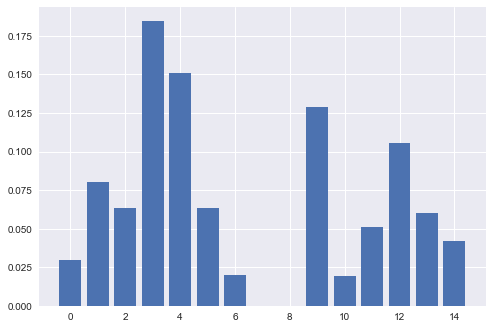

In [471]:
predictors = [x for x in X_train.columns]
modelfit(model, X_train, predictors)

In [ ]:
X_print = X[X.columns.tolist()]

In [ ]:
mask = np.triu(X_print.corr())
ax = sns.heatmap(round(X_print.corr()*100,0)
                 ,annot=True
                 ,mask=mask
                 ,cmap='coolwarm')
ax.set_ylim((0,20))

In [496]:
X.columns

Index(['target', 'dataset', 'age', 'employed', 'ext_source_1', 'ext_source_2',
       'ext_source_3', 'app_nan', 'base_nan', 'fond_nan', 'housetype_nan',
       'higher_educ', 'no_own_prop', 'blue_collar', 'blue_collar2', 'complete',
       'code_gender_M', 'emergencystate_mode_Yes',
       'emergencystate_mode_missing'],
      dtype='object')